In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix

#Đọc dữ liệu

In [2]:
#df = pd.read_csv("/content/drive/MyDrive/KTDL/heart_disease.csv")
df = pd.read_csv("heart_2020_cleaned (2) (1).csv")

In [3]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,1,24.48,1,0,0,12,30,0,0,6,0,2,0,1,4,0,0,0
1,0,26.63,0,0,0,0,0,0,1,3,3,0,0,4,7,0,0,0
2,1,25.77,1,0,1,0,0,0,1,11,5,0,1,2,11,1,0,1
3,1,35.36,1,0,0,0,0,1,0,10,5,0,0,1,8,1,0,1
4,0,39.16,0,0,0,0,10,0,1,1,5,0,1,1,8,0,0,0


In [4]:
df.tail()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
16566,1,24.68,0,0,0,0,0,0,1,10,5,2,1,4,8,0,0,1
16567,1,37.12,1,0,0,4,5,0,1,10,5,2,0,2,8,1,0,0
16568,1,40.45,0,0,0,15,15,1,1,8,5,0,0,3,6,0,0,0
16569,0,22.31,0,0,0,0,0,0,0,3,5,0,1,4,8,0,0,0
16570,1,19.58,1,0,0,3,30,0,1,12,2,0,1,3,7,0,0,0


#Kiểm tra kiểu dữ liệu

In [5]:
df.describe()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,16571.000000,16571.000000,16571.000000,16571.000000,16571.000000,16571.000000,16571.000000,16571.000000,16571.000000,16571.000000,16571.000000,16571.000000,16571.000000,16571.000000,16571.000000,16571.000000,16571.000000,16571.000000
mean,0.591093,29.099092,0.529298,0.054191,0.111762,6.153763,4.382898,0.281154,0.522298,8.035061,4.331905,0.535997,0.679500,2.206023,7.121296,0.160642,0.091847,0.153763
std,0.491647,6.608555,0.499156,0.226401,0.315082,10.460427,8.731112,0.449576,0.499518,3.238262,1.355659,0.881832,0.466683,1.314159,1.701293,0.367212,0.288819,0.360732
min,0.000000,12.210000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,24.540000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,5.000000,0.000000,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,28.060000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,9.000000,5.000000,0.000000,1.000000,2.000000,7.000000,0.000000,0.000000,0.000000
75%,1.000000,32.490000,1.000000,0.000000,0.000000,7.000000,4.000000,1.000000,1.000000,11.000000,5.000000,2.000000,1.000000,4.000000,8.000000,0.000000,0.000000,0.000000
max,1.000000,83.000000,1.000000,1.000000,1.000000,30.000000,30.000000,1.000000,1.000000,12.000000,5.000000,3.000000,1.000000,4.000000,24.000000,1.000000,1.000000,1.000000


#Xử lý dữ liệu bất thường

In [6]:
total_null = df.isnull().sum().sort_values(ascending=False)
total_null

HeartDisease        0
BMI                 0
KidneyDisease       0
Asthma              0
SleepTime           0
GenHealth           0
PhysicalActivity    0
Diabetic            0
Race                0
AgeCategory         0
Sex                 0
DiffWalking         0
MentalHealth        0
PhysicalHealth      0
Stroke              0
AlcoholDrinking     0
Smoking             0
SkinCancer          0
dtype: int64

In [7]:
print('HeartDisease: ', df['HeartDisease'].unique())
print('BMI: ', df['BMI'].unique())
print('Smoking: ', df['Smoking'].unique())
print('AlcoholDrinking: ', df['AlcoholDrinking'].unique())
print('Stroke: ', df['Stroke'].unique())
print('PhysicalHealth: ', df['PhysicalHealth'].unique())
print('MentalHealth: ', df['MentalHealth'].unique())
print('DiffWalking: ', df['DiffWalking'].unique())
print('Sex: ', df['Sex'].unique())
print('AgeCategory: ', df['AgeCategory'].unique())
print('Race: ', df['Race'].unique())
print('Diabetic: ', df['Diabetic'].unique())
print('PhysicalActivity: ', df['PhysicalActivity'].unique())
print('GenHealth: ', df['GenHealth'].unique())
print('SleepTime: ', df['SleepTime'].unique())
print('Asthma: ', df['Asthma'].unique())
print('KidneyDisease: ', df['KidneyDisease'].unique())
print('SkinCancer: ', df['SkinCancer'].unique())

HeartDisease:  [1 0]
BMI:  [24.48 26.63 25.77 ... 16.5  68.66 15.23]
Smoking:  [1 0]
AlcoholDrinking:  [0 1]
Stroke:  [0 1]
PhysicalHealth:  [12  0 14 24 30 20  2  3 15  4 18  7 10  5  1 21 25  8 22 28  6  9 26 17
 16 27 13 29 19 23]
MentalHealth:  [30  0 10  3 20 15  4  5  7  2  8 29 25  1 18 14 28 16 22  6 21 24 27 13
 12 17 26 23 19  9 11]
DiffWalking:  [0 1]
Sex:  [0 1]
AgeCategory:  [ 6  3 11 10  1  0 12  5  7  9  4  8  2]
Race:  [0 3 5 2 4 1]
Diabetic:  [2 0 1 3]
PhysicalActivity:  [0 1]
GenHealth:  [1 4 2 3 0]
SleepTime:  [ 4  7 11  8  5 12  9  6 15 10 16  1  3  2 18 20 19 14 13 22 24]
Asthma:  [0 1]
KidneyDisease:  [0 1]
SkinCancer:  [0 1]


#Kiểm tra dữ liệu trùng

In [8]:
dup =df[df.duplicated(keep=False)]
dup

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer


#Thông kê mổ tả

In [9]:
df.describe()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,16571.000000,16571.000000,16571.000000,16571.000000,16571.000000,16571.000000,16571.000000,16571.000000,16571.000000,16571.000000,16571.000000,16571.000000,16571.000000,16571.000000,16571.000000,16571.000000,16571.000000,16571.000000
mean,0.591093,29.099092,0.529298,0.054191,0.111762,6.153763,4.382898,0.281154,0.522298,8.035061,4.331905,0.535997,0.679500,2.206023,7.121296,0.160642,0.091847,0.153763
std,0.491647,6.608555,0.499156,0.226401,0.315082,10.460427,8.731112,0.449576,0.499518,3.238262,1.355659,0.881832,0.466683,1.314159,1.701293,0.367212,0.288819,0.360732
min,0.000000,12.210000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,24.540000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,5.000000,0.000000,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,28.060000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,9.000000,5.000000,0.000000,1.000000,2.000000,7.000000,0.000000,0.000000,0.000000
75%,1.000000,32.490000,1.000000,0.000000,0.000000,7.000000,4.000000,1.000000,1.000000,11.000000,5.000000,2.000000,1.000000,4.000000,8.000000,0.000000,0.000000,0.000000
max,1.000000,83.000000,1.000000,1.000000,1.000000,30.000000,30.000000,1.000000,1.000000,12.000000,5.000000,3.000000,1.000000,4.000000,24.000000,1.000000,1.000000,1.000000


In [10]:
data = df.copy()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16571 entries, 0 to 16570
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      16571 non-null  int64  
 1   BMI               16571 non-null  float64
 2   Smoking           16571 non-null  int64  
 3   AlcoholDrinking   16571 non-null  int64  
 4   Stroke            16571 non-null  int64  
 5   PhysicalHealth    16571 non-null  int64  
 6   MentalHealth      16571 non-null  int64  
 7   DiffWalking       16571 non-null  int64  
 8   Sex               16571 non-null  int64  
 9   AgeCategory       16571 non-null  int64  
 10  Race              16571 non-null  int64  
 11  Diabetic          16571 non-null  int64  
 12  PhysicalActivity  16571 non-null  int64  
 13  GenHealth         16571 non-null  int64  
 14  SleepTime         16571 non-null  int64  
 15  Asthma            16571 non-null  int64  
 16  KidneyDisease     16571 non-null  int64 

Text(0.5, 1.0, '')

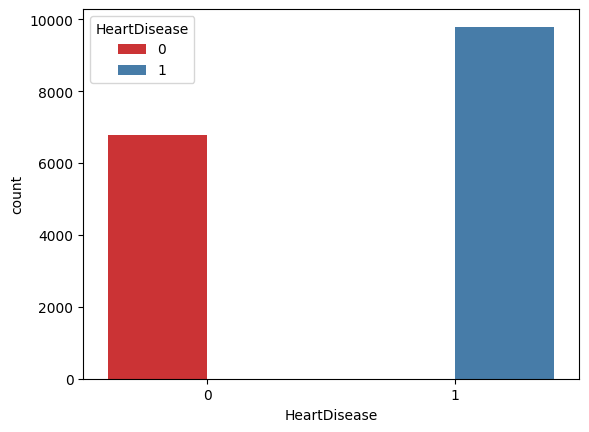

In [12]:
sns.countplot(x='HeartDisease', hue='HeartDisease', data=df, palette='Set1').set_title('')

# Phân tích phân phối của các biến liên tục

Text(0.5, 1.0, 'Phân phối dữ liệu của biến AgeCategory')

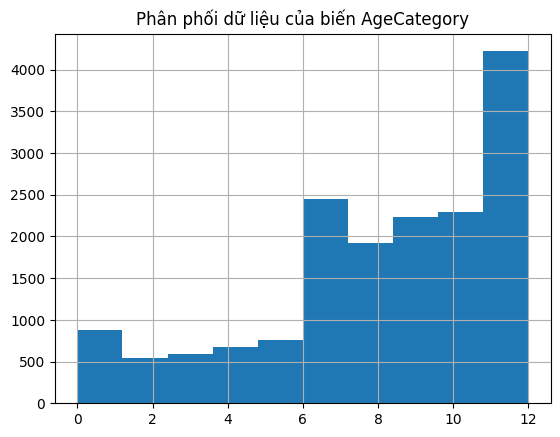

In [13]:
df["AgeCategory"].hist().plot(kind="bar")
plt.title("Phân phối dữ liệu của biến AgeCategory")

Text(0.5, 1.0, 'Phân phối dữ liệu của biến BMI')

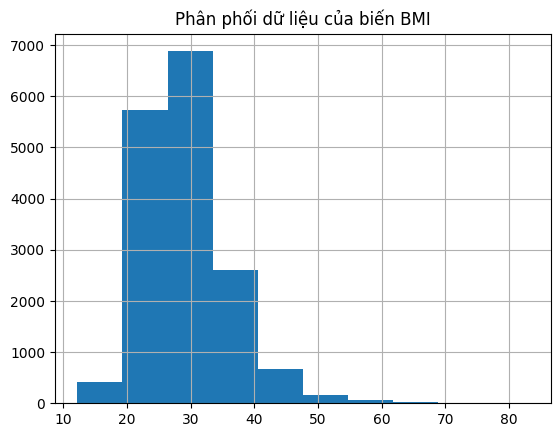

In [14]:
df["BMI"].hist().plot(kind="bar")
plt.title("Phân phối dữ liệu của biến BMI")

Text(0.5, 1.0, 'Phân phối dữ liệu của biến PhysicalHealth')

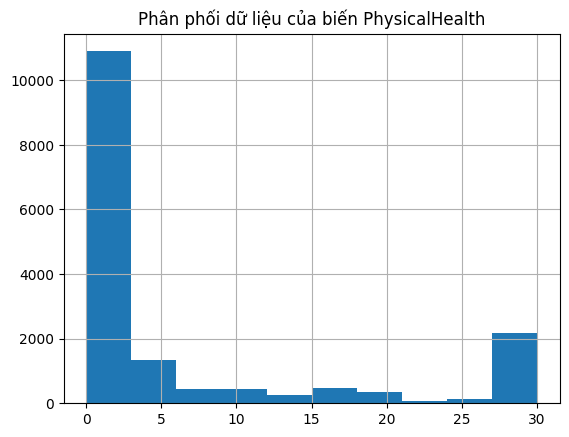

In [15]:
df["PhysicalHealth"].hist().plot(kind="bar")
plt.title("Phân phối dữ liệu của biến PhysicalHealth")

Text(0.5, 1.0, 'Phân phối dữ liệu của biến MentalHealth')

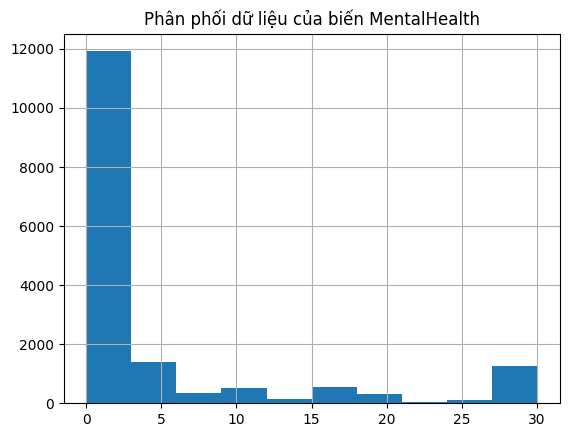

In [16]:
df["MentalHealth"].hist().plot(kind="bar")
plt.title("Phân phối dữ liệu của biến MentalHealth")

Text(0.5, 1.0, 'Phân phối dữ liệu của biến SleepTime')

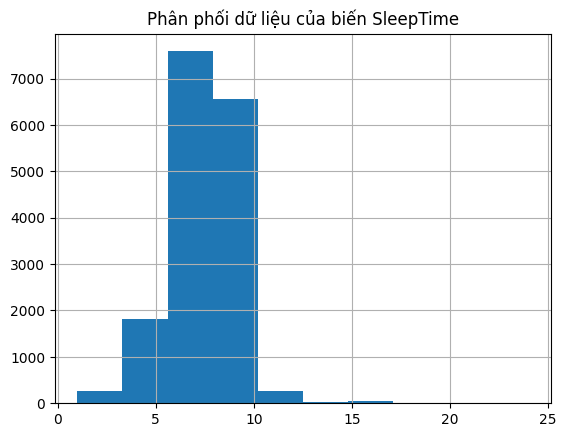

In [17]:
df["SleepTime"].hist().plot(kind="bar")
plt.title("Phân phối dữ liệu của biến SleepTime")

# Phân tích ảnh hưởng các biến rời rạc lên biến target

<Axes: xlabel='Smoking', ylabel='count'>

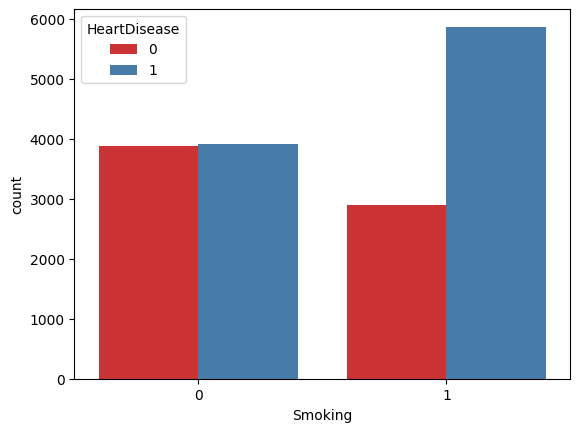

In [18]:
sns.countplot(x='Smoking', hue='HeartDisease', data=df, palette='Set1')

<Axes: xlabel='AlcoholDrinking', ylabel='count'>

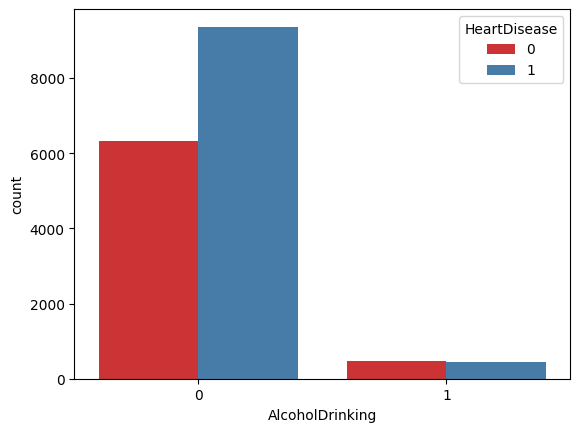

In [19]:
sns.countplot(x='AlcoholDrinking', hue='HeartDisease', data=df, palette='Set1')

<Axes: xlabel='Stroke', ylabel='count'>

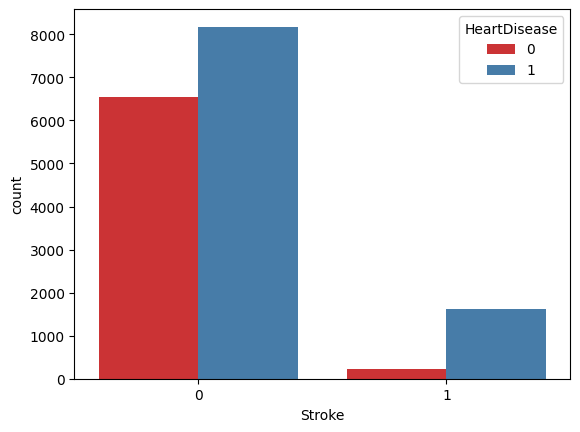

In [20]:
sns.countplot(x='Stroke', hue='HeartDisease', data=df, palette='Set1')

<Axes: xlabel='DiffWalking', ylabel='count'>

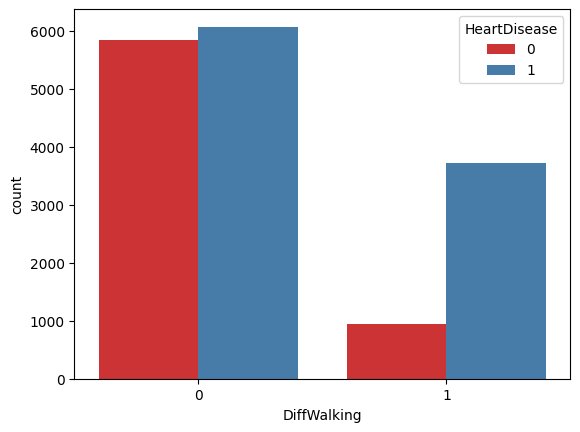

In [21]:
sns.countplot(x='DiffWalking', hue='HeartDisease', data=df, palette='Set1')

<Axes: xlabel='Sex', ylabel='count'>

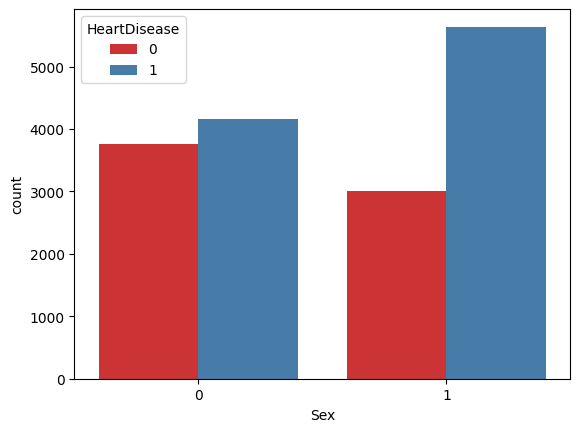

In [22]:
sns.countplot(x='Sex', hue='HeartDisease', data=df, palette='Set1')

<Axes: xlabel='Race', ylabel='count'>

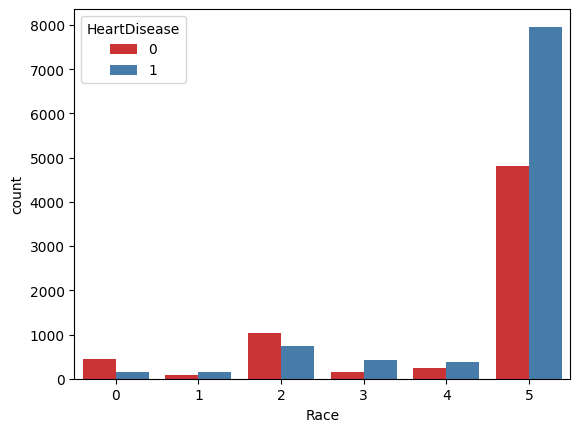

In [23]:
sns.countplot(x='Race', hue='HeartDisease', data=df, palette='Set1')

<Axes: xlabel='Diabetic', ylabel='count'>

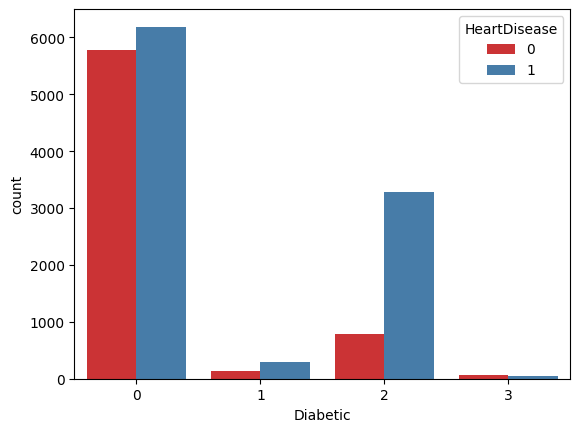

In [24]:
sns.countplot(x='Diabetic', hue='HeartDisease', data=df, palette='Set1')

<Axes: xlabel='PhysicalActivity', ylabel='count'>

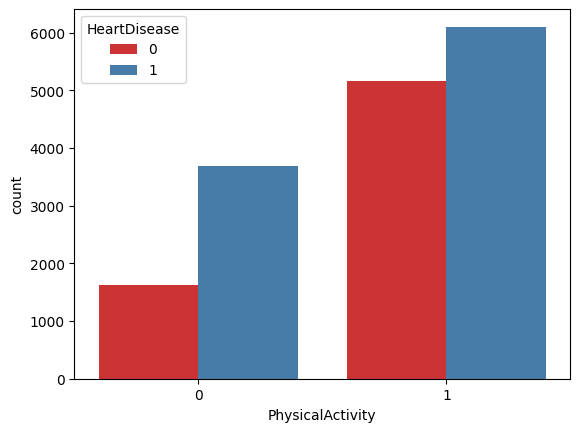

In [25]:
sns.countplot(x='PhysicalActivity', hue='HeartDisease', data=df, palette='Set1')

<Axes: xlabel='GenHealth', ylabel='count'>

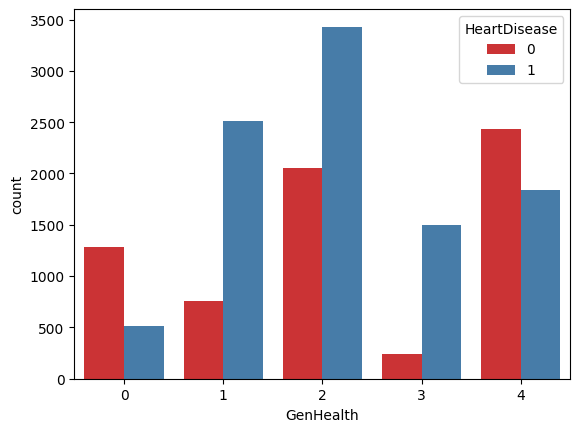

In [26]:
sns.countplot(x='GenHealth', hue='HeartDisease', data=df, palette='Set1')

<Axes: xlabel='Asthma', ylabel='count'>

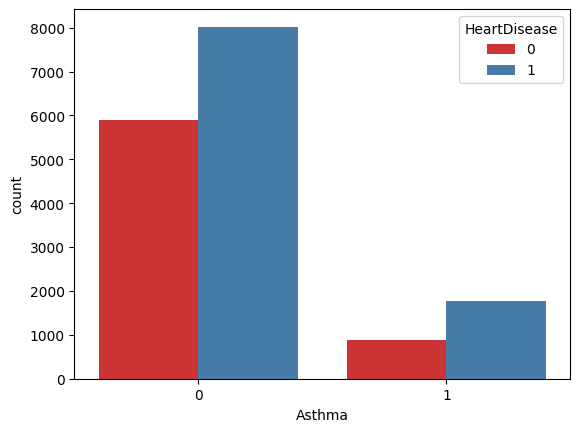

In [27]:
sns.countplot(x='Asthma', hue='HeartDisease', data=df, palette='Set1')

<Axes: xlabel='KidneyDisease', ylabel='count'>

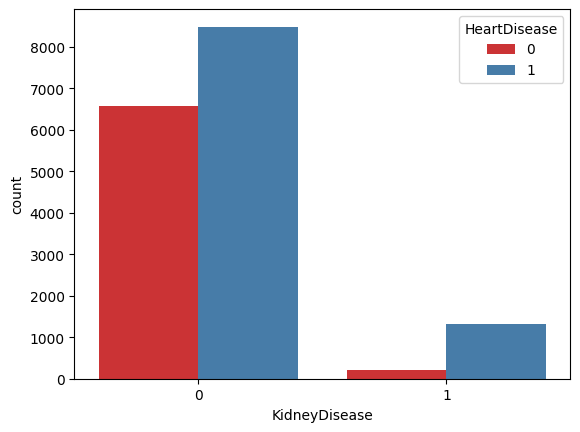

In [28]:
sns.countplot(x='KidneyDisease', hue='HeartDisease', data=df, palette='Set1')

<Axes: xlabel='SkinCancer', ylabel='count'>

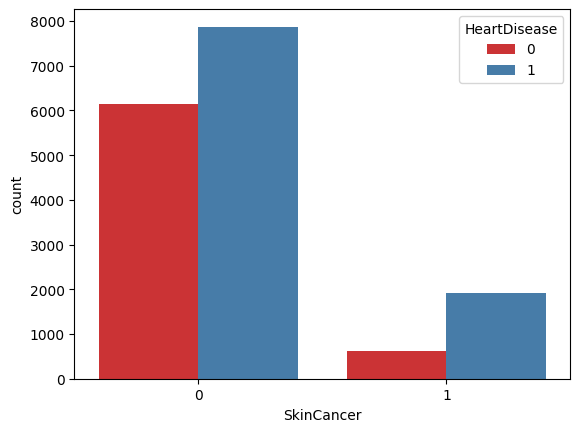

In [29]:
sns.countplot(x='SkinCancer', hue='HeartDisease', data=df, palette='Set1')

# Phân tích tương quan giữa các biến với nhau.

In [30]:
#Ma trận tương quan
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
HeartDisease,1.000000,0.029533,0.169074,-0.053026,0.203867,0.227994,0.053924,0.264326,0.128789,0.460357,0.158547,0.238855,-0.145640,-0.034653,0.025102,0.067026,0.176106,0.141182
BMI,0.029533,1.000000,-0.026941,-0.033812,0.003159,0.110562,0.076308,0.183588,-0.003627,-0.084760,-0.076157,0.224042,-0.141807,-0.010833,-0.036031,0.104337,0.061560,-0.054617
Smoking,0.169074,-0.026941,1.000000,0.094891,0.065133,0.125307,0.079271,0.112143,0.124875,0.088953,0.046274,0.062489,-0.095053,-0.010950,-0.009160,0.042805,0.028637,0.017880
AlcoholDrinking,-0.053026,-0.033812,0.094891,1.000000,-0.013842,-0.014094,0.026810,-0.044158,0.019732,-0.087872,0.015917,-0.067507,0.005031,0.028599,-0.008762,-0.004542,-0.037359,-0.005231
Stroke,0.203867,0.003159,0.065133,-0.013842,1.000000,0.176501,0.088690,0.204628,-0.010850,0.123150,-0.024540,0.111498,-0.106888,-0.031708,0.012312,0.069629,0.087472,0.044724
PhysicalHealth,0.227994,0.110562,0.125307,-0.014094,0.176501,1.000000,0.330592,0.451803,-0.052677,0.100308,0.023051,0.170290,-0.281375,-0.016884,-0.061991,0.134829,0.170912,0.046065
MentalHealth,0.053924,0.076308,0.079271,0.026810,0.088690,0.330592,1.000000,0.204930,-0.124551,-0.134248,-0.030434,0.051498,-0.138090,-0.016117,-0.120921,0.111616,0.056079,-0.028313
DiffWalking,0.264326,0.183588,0.112143,-0.044158,0.204628,0.451803,0.204930,1.000000,-0.089592,0.225991,0.007788,0.230591,-0.331304,-0.065564,-0.043327,0.142776,0.172008,0.053073
Sex,0.128789,-0.003627,0.124875,0.019732,-0.010850,-0.052677,-0.124551,-0.089592,1.000000,0.015690,0.068833,0.010680,0.083341,-0.000839,0.016772,-0.094873,-0.025491,0.059008
AgeCategory,0.460357,-0.084760,0.088953,-0.087872,0.123150,0.100308,-0.134248,0.225991,0.015690,1.000000,0.185067,0.182123,-0.132932,0.017773,0.125685,-0.042141,0.136644,0.268579


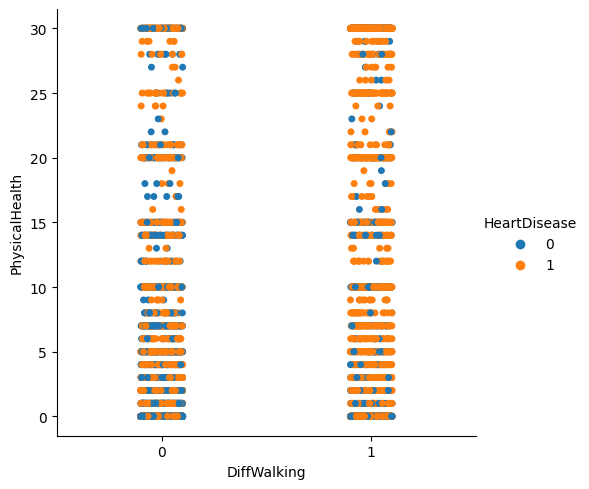

In [31]:
sns.catplot(x="DiffWalking", y="PhysicalHealth", hue="HeartDisease", data=df)

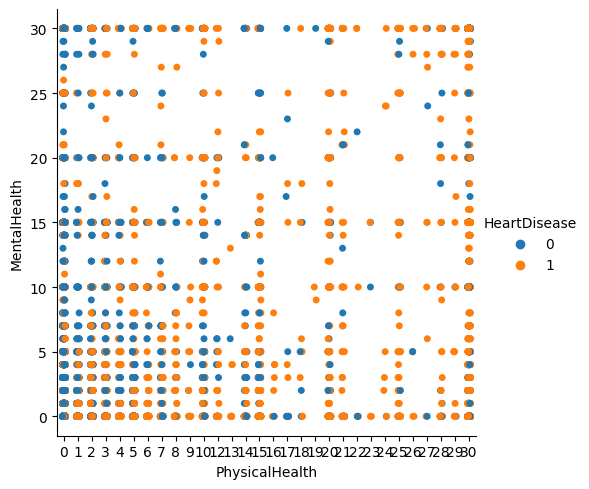

In [32]:
sns.catplot(x="PhysicalHealth", y="MentalHealth", hue="HeartDisease", data=df)

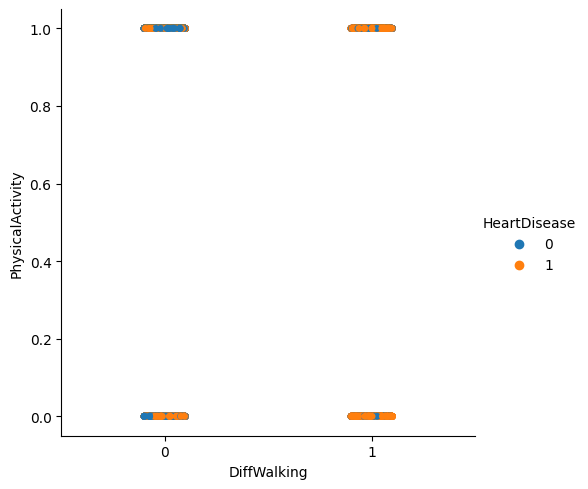

In [33]:
sns.catplot(x="DiffWalking", y="PhysicalActivity", hue="HeartDisease", data=df)

<Axes: xlabel='DiffWalking', ylabel='PhysicalHealth'>

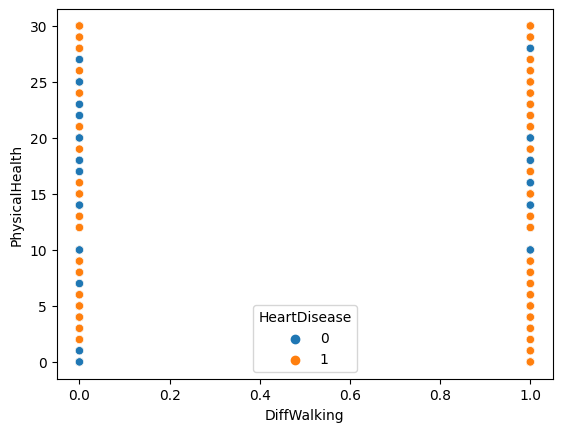

In [34]:
sns.scatterplot(x="DiffWalking", y="PhysicalHealth", hue="HeartDisease", data=df)

<Axes: xlabel='PhysicalHealth', ylabel='MentalHealth'>

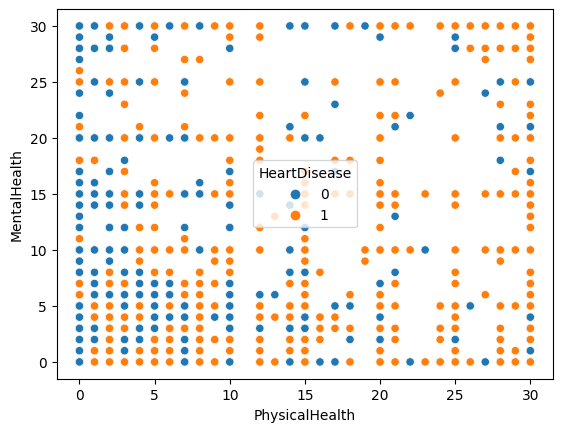

In [35]:
sns.scatterplot(x="PhysicalHealth", y="MentalHealth", hue="HeartDisease", data=df)

<Axes: xlabel='DiffWalking', ylabel='PhysicalActivity'>

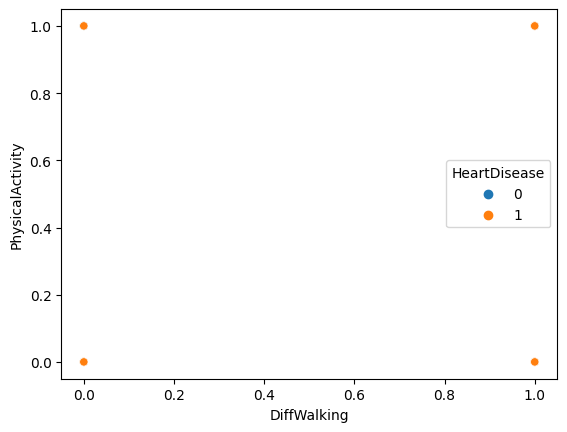

In [36]:
sns.scatterplot(x="DiffWalking", y="PhysicalActivity", hue="HeartDisease", data=df)

# Phân tích Anova lên các biến rời rạc

In [37]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('HeartDisease ~ C(Sex)',data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Sex),66.433872,1.0,279.460656,3.182991e-62
Residual,3938.811436,16569.0,NaN,NaN


In [38]:
model = ols('HeartDisease ~ C(Smoking)',data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Smoking),114.493610,1.0,487.57792,1.640728e-106
Residual,3890.751698,16569.0,NaN,NaN


In [39]:
model = ols('HeartDisease ~ C(AlcoholDrinking)',data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(AlcoholDrinking),11.261867,1.0,46.719741,8.475492e-12
Residual,3993.983441,16569.0,NaN,NaN


In [40]:
model = ols('HeartDisease ~ C(Stroke)',data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Stroke),166.465507,1.0,718.500964,5.622912e-155
Residual,3838.779801,16569.0,NaN,NaN


In [41]:
model = ols('HeartDisease ~ C(AlcoholDrinking)',data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(AlcoholDrinking),11.261867,1.0,46.719741,8.475492e-12
Residual,3993.983441,16569.0,NaN,NaN


In [42]:
model = ols('HeartDisease ~ C(DiffWalking)',data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(DiffWalking),279.840289,1.0,1244.609305,5.965833e-263
Residual,3725.405019,16569.0,NaN,NaN


# Chia giỏ thuộc tính BMI và các thuộc tính thuộc kiểu dữ liệu categorical

In [43]:
for i in df["BMI"]:
    if i<18.5:
        df["BMI"].replace(i,"Underweight",inplace=True)
    else:
        if 18.5<=i<25:
            df["BMI"].replace(i,"Healthy Weight",inplace=True)
        else:
            if 25<=i<30:
                df["BMI"].replace(i,"Overweight",inplace=True)
            else:
                df["BMI"].replace(i,"Obesity",inplace=True)

<Axes: xlabel='BMI', ylabel='count'>

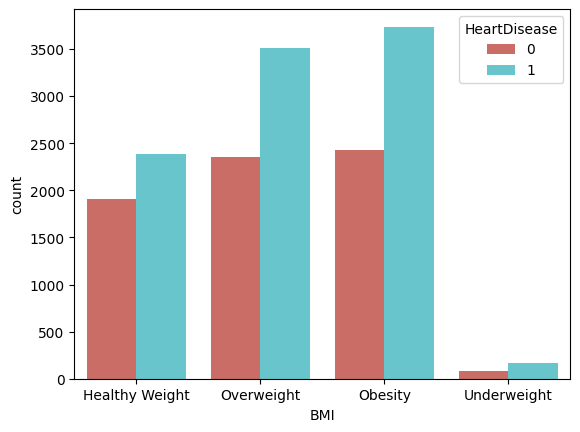

In [44]:
sns.countplot(x='BMI', hue='HeartDisease', data=df, palette='hls')

In [45]:
df= pd.get_dummies(df,columns = ["BMI","AgeCategory","Race","Diabetic","GenHealth"])
df

,HeartDisease,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,PhysicalActivity,SleepTime,...,Race_5,Diabetic_0,Diabetic_1,Diabetic_2,Diabetic_3,GenHealth_0,GenHealth_1,GenHealth_2,GenHealth_3,GenHealth_4
0,1,1,0,0,12,30,0,0,0,4,...,False,False,False,True,False,False,True,False,False,False
1,0,0,0,0,0,0,0,1,0,7,...,False,True,False,False,False,False,False,False,False,True
2,1,1,0,1,0,0,0,1,1,11,...,True,True,False,False,False,False,False,True,False,False
3,1,1,0,0,0,0,1,0,0,8,...,True,True,False,False,False,False,True,False,False,False
4,0,0,0,0,0,10,0,1,1,8,...,True,True,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16566,1,0,0,0,0,0,0,1,1,8,...,True,False,False,True,False,False,False,False,False,True
16567,1,1,0,0,4,5,0,1,0,8,...,True,False,False,True,False,False,False,True,False,False
16568,1,0,0,0,15,15,1,1,0,6,...,True,True,False,False,False,False,False,False,True,False
16569,0,0,0,0,0,0,0,0,1,8,...,True,True,False,False,False,False,False,False,False,True


##Model

In [46]:
X=df.drop(columns=["HeartDisease"])
Y=df["HeartDisease"]

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import recall_score

In [48]:
#chia train,test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [49]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
RF= RandomForestClassifier(criterion='gini')
RF.fit(X_train,Y_train)

RandomForestClassifier()

In [50]:
#đánh giá mô hình
Y_pre = RF.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pre))

              precision    recall  f1-score   support

           0       0.76      0.65      0.70      1381
           1       0.77      0.85      0.81      1934

    accuracy                           0.77      3315
   macro avg       0.77      0.75      0.76      3315
weighted avg       0.77      0.77      0.76      3315



<Axes: >

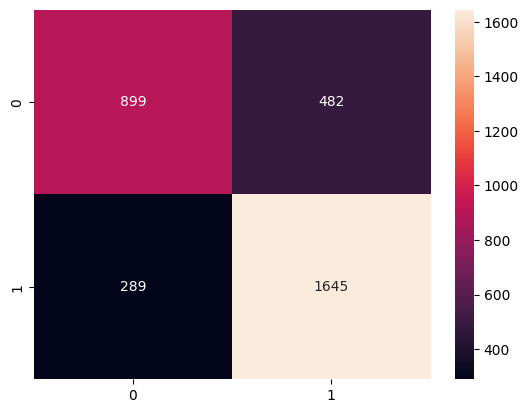

In [51]:
#confusion maxtrix
cm = confusion_matrix(Y_test, Y_pre)
import seaborn as sn
sn.heatmap(cm, annot=True,fmt="d")

In [52]:
#Huấn luyện mô hình decisionTree độ đo Gini
DecisionTreeGini = DecisionTreeClassifier(criterion="gini")
DecisionTreeGini.fit(X_train,Y_train)

DecisionTreeClassifier()

In [53]:
#đánh giá mô hình
Y_pre = DecisionTreeGini.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pre))

              precision    recall  f1-score   support

           0       0.63      0.64      0.63      1381
           1       0.74      0.73      0.73      1934

    accuracy                           0.69      3315
   macro avg       0.68      0.68      0.68      3315
weighted avg       0.69      0.69      0.69      3315



<Axes: >

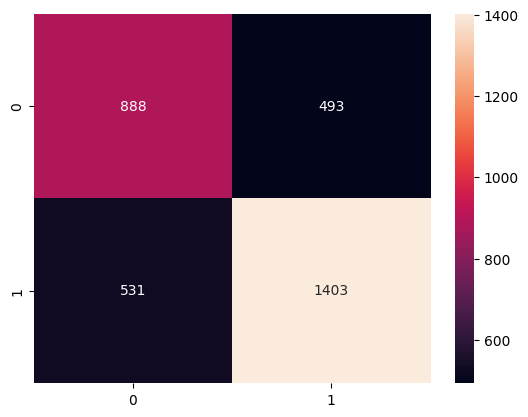

In [54]:
#confusion maxtrix
cm = confusion_matrix(Y_test, Y_pre)
import seaborn as sn
sn.heatmap(cm, annot=True,fmt="d")

In [55]:
#Huấn luyện mô hình decisionTree độ đo Entropi
DecisionTreeEntropy = DecisionTreeClassifier(criterion="entropy")
DecisionTreeEntropy.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy')

In [56]:
#Đánh giá mô hình
Y_pre = DecisionTreeEntropy.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pre))

              precision    recall  f1-score   support

           0       0.63      0.65      0.64      1381
           1       0.74      0.73      0.73      1934

    accuracy                           0.69      3315
   macro avg       0.68      0.69      0.69      3315
weighted avg       0.69      0.69      0.69      3315



<Axes: >

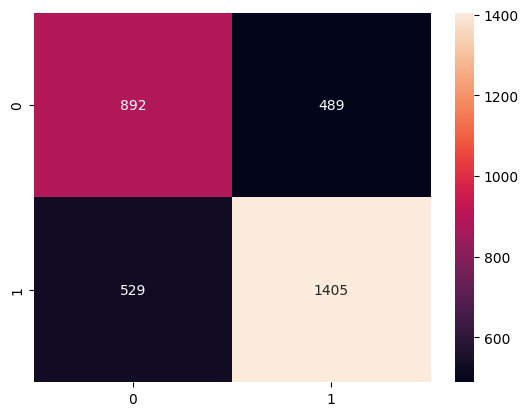

In [57]:
#confusion maxtrix
cm = confusion_matrix(Y_test, Y_pre)
import seaborn as sn
sn.heatmap(cm, annot=True,fmt="d")

In [58]:
#Huấn luyện mô hình Naive Bayes
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train,Y_train)

GaussianNB()

In [59]:
#Đánh giá mô hình
Y_pre = GNB.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pre))

              precision    recall  f1-score   support

           0       0.76      0.59      0.66      1381
           1       0.75      0.87      0.80      1934

    accuracy                           0.75      3315
   macro avg       0.76      0.73      0.73      3315
weighted avg       0.75      0.75      0.75      3315



<Axes: >

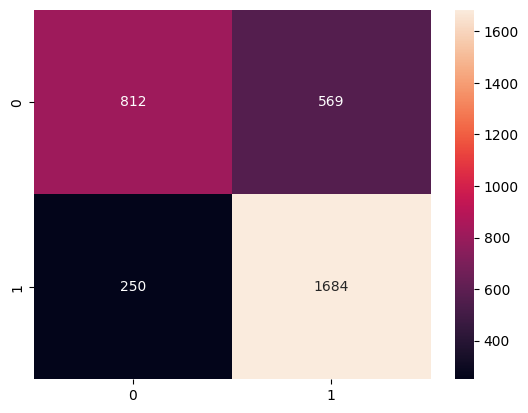

In [60]:
#confusion maxtrix
cm = confusion_matrix(Y_test, Y_pre)
import seaborn as sn
sn.heatmap(cm, annot=True,fmt="d")

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
#Huấn luyện mô hình LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,Y_train)

C:\Users\84917\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [63]:
#Đánh giá mô hình
Y_pre = LR.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pre))

              precision    recall  f1-score   support

           0       0.77      0.68      0.72      1381
           1       0.79      0.85      0.82      1934

    accuracy                           0.78      3315
   macro avg       0.78      0.77      0.77      3315
weighted avg       0.78      0.78      0.78      3315



<Axes: >

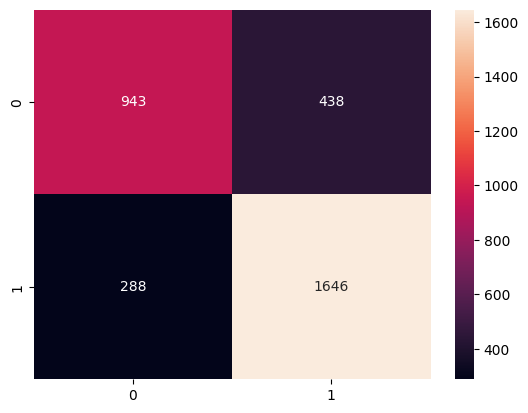

In [64]:
#confusion maxtrix
cm = confusion_matrix(Y_test, Y_pre)
import seaborn as sn
sn.heatmap(cm, annot=True,fmt="d")

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16571 entries, 0 to 16570
Data columns (total 45 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   HeartDisease        16571 non-null  int64
 1   Smoking             16571 non-null  int64
 2   AlcoholDrinking     16571 non-null  int64
 3   Stroke              16571 non-null  int64
 4   PhysicalHealth      16571 non-null  int64
 5   MentalHealth        16571 non-null  int64
 6   DiffWalking         16571 non-null  int64
 7   Sex                 16571 non-null  int64
 8   PhysicalActivity    16571 non-null  int64
 9   SleepTime           16571 non-null  int64
 10  Asthma              16571 non-null  int64
 11  KidneyDisease       16571 non-null  int64
 12  SkinCancer          16571 non-null  int64
 13  BMI_Healthy Weight  16571 non-null  bool 
 14  BMI_Obesity         16571 non-null  bool 
 15  BMI_Overweight      16571 non-null  bool 
 16  BMI_Underweight     16571 non-null  bool

> Demo

In [66]:
print('Chọn mô hình cần chạy:(1-4)')
print('1:Random Forest, 2: Naïve bayes,3: Decision Tree gini,4: Decision tree entropy,5: LogisticRegression')
y=int(input())
if (y==1):
    model=RF
elif (y==2):
    model=GNB
elif (y==3):
    model=DecisionTreeGini
elif (y==4):
    model=DecisionTreeEntropy
else:
    model=LR
print('Nhập hàng cần predict trong tập X_test')
print('Giá trị hàng tối đa là', len(X_test))
x = int(input())
X_test.reset_index(drop=True, inplace=True)
x_test=X_test.iloc[[x]]
if model.predict((x_test))==[1]:
    print('Kết quả dự đoán: Bị bệnh')
else:
    print('Kết quả dự đoán: Không bị bệnh')

Chọn mô hình cần chạy:(1-4)
1:Random Forest, 2: Naïve bayes,3: Decision Tree gini,4: Decision tree entropy,5: LogisticRegression
5
Nhập hàng cần predict trong tập X_test
Giá trị hàng tối đa là 3315
3314
Kết quả dự đoán: Không bị bệnh


In [67]:
X_test.tail()

,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,PhysicalActivity,SleepTime,Asthma,...,Race_5,Diabetic_0,Diabetic_1,Diabetic_2,Diabetic_3,GenHealth_0,GenHealth_1,GenHealth_2,GenHealth_3,GenHealth_4
3310,1,0,0,0,0,0,0,1,6,0,...,True,True,False,False,False,False,False,False,False,True
3311,0,0,0,10,3,0,1,0,7,0,...,False,True,False,False,False,False,False,True,False,False
3312,0,0,0,0,0,0,0,1,6,0,...,True,True,False,False,False,False,False,True,False,False
3313,0,0,0,0,0,0,1,1,7,0,...,True,False,True,False,False,False,False,True,False,False
3314,1,0,0,7,10,1,0,1,4,0,...,True,True,False,False,False,False,False,False,False,True


In [68]:
Y_test.tail()

15992    1
7676     0
11256    1
8969     0
7733     0
Name: HeartDisease, dtype: int64